<a href="https://colab.research.google.com/github/april-sang-codes-display/Python-Code-Display/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
#len(x_train)

#Create a model and add layers
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)

# Train the model
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=30,
    validation_data=(x_test, y_test),
    shuffle=True
)

Using TensorFlow backend.


170500096/170498071 [==============================] - 5s 0us/step


W0619 00:20:17.772075 139911841650560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0619 00:20:17.805177 139911841650560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 00:20:17.812523 139911841650560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0619 00:20:17.868116 139911841650560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0619 00:20:17.873238 139911841650560 deprecation_wrapp

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 267s 5ms/step - loss: 1.5118 - acc: 0.4460 - val_loss: 1.1219 - val_acc: 0.5983
Epoch 2/30
50000/50000 [==============================] - 264s 5ms/step - loss: 1.1136 - acc: 0.6050 - val_loss: 0.9341 - val_acc: 0.6669
Epoch 3/30
50000/50000 [==============================] - 262s 5ms/step - loss: 0.9671 - acc: 0.6595 - val_loss: 0.8207 - val_acc: 0.7137
Epoch 4/30
50000/50000 [==============================] - 263s 5ms/step - loss: 0.8786 - acc: 0.6922 - val_loss: 0.7913 - val_acc: 0.7268
Epoch 5/30
50000/50000 [==============================] - 259s 5ms/step - loss: 0.8146 - acc: 0.7148 - val_loss: 0.7570 - val_acc: 0.7425
Epoch 6/30
50000/50000 [==============================] - 265s 5ms/step - loss: 0.7665 - acc: 0.7302 - val_loss: 0.7331 - val_acc: 0.7477
Epoch 7/30
50000/50000 [==============================] - 265s 5ms/step - loss: 0.7280 - acc: 0.7442 - val_loss: 0.7196 - 

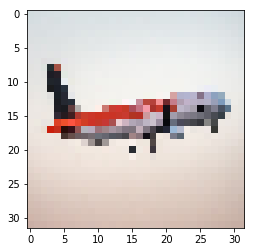

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(img)

In [8]:
from keras.preprocessing import image
import numpy as np

class_labels = [
    "Plane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

img = image.load_img("/content/airbus-albatross-1.jpg", target_size=(32, 32))

# Convert the image to a numpy array
image_to_test = image.img_to_array(img)

# Add a fourth dimension to the image (since Keras expects a list of images, not a single image)
list_of_images = np.expand_dims(image_to_test, axis=0)

# Make a prediction using the model
results = model.predict(list_of_images)

# Since we are only testing one image, we only need to check the first result
single_result = results[0]

# We will get a likelihood score for all 10 possible classes. Find out which class had the highest score.
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

# Get the name of the most likely class
class_label = class_labels[most_likely_class_index]

# Print the result
print("This is image is a {} - Likelihood: {:2f}".format(class_label, class_likelihood))

<PIL.Image.Image image mode=RGB size=32x32 at 0x7F3F851CB198>
This is image is a Plane - Likelihood: 1.000000
